<a href="https://colab.research.google.com/github/Viyaaa/Movie-Recommender-System/blob/main/Movie%20Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation

Purpose: to recommend movies to user based on rating.



In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


In [3]:
! kaggle datasets download -d sankha1998/tmdb-top-10000-popular-movies-dataset

  0% 0.00/1.31M [00:00<?, ?B/s]
100% 1.31M/1.31M [00:00<00:00, 134MB/s]


In [4]:
! unzip /content/tmdb-top-10000-popular-movies-dataset.zip

Archive:  /content/tmdb-top-10000-popular-movies-dataset.zip
  inflating: TMDb_updated.CSV        


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
movies_df = pd.read_csv('/content/tmdb-top-10000-popular-movies-dataset.zip')
movies_df.head()

,Unnamed: 0,title,overview,original_language,vote_count,vote_average
0,0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


In [7]:
df = movies_df.copy()

In [8]:
df = df.drop(columns=['Unnamed: 0'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              10000 non-null  object 
 1   overview           9970 non-null   object 
 2   original_language  10000 non-null  object 
 3   vote_count         10000 non-null  int64  
 4   vote_average       10000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 390.8+ KB


In [10]:
df.describe()

,vote_count,vote_average
count,10000.000000,10000.000000
mean,1020.825100,6.306230
std,1992.305005,1.354259
min,0.000000,0.000000
25%,143.000000,5.800000
50%,332.000000,6.500000
75%,926.250000,7.100000
max,25148.000000,10.000000


In [11]:
df[df.isnull().any(axis=1)]

,title,overview,original_language,vote_count,vote_average
98,Recep İvedik 6,NaN,tr,21,4.4
394,Arjona Circo Soledad en Vivo,NaN,es,0,0.0
644,Ustica: The Missing Paper,NaN,it,26,5.6
696,Autonomes,NaN,fr,0,0.0
769,Tout nous sourit,NaN,fr,0,0.0
998,Vivre sans eux,NaN,fr,0,0.0
1438,La noche mágica,NaN,es,0,0.0
1582,The Water Monster,NaN,zh,1,10.0
1631,The Lion,NaN,fr,18,4.6
1650,Mucize 2: Aşk,NaN,tr,1,8.0


**Pie Chart of Movie Language**

In [12]:
# df['original_language'].value_counts().sort_values(ascending=False)
lang_counts = df.groupby('original_language').size().reset_index(name='count')
lang_counts_sorted = lang_counts.sort_values(by='count', ascending=False)
lang_counts_filtered = lang_counts_sorted[lang_counts_sorted['count'] > 50]

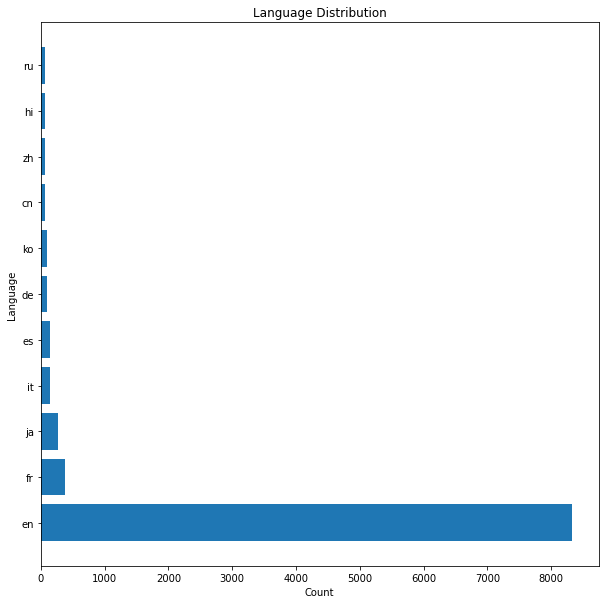

In [13]:
# plt.pie(lang_counts_filtered['count'], labels=lang_counts_filtered['original_language'], autopct='%1.1f%%')
# plt.title('Language Distribution')
# plt.show()

plt.figure(figsize=(10,10))
plt.barh(lang_counts_filtered['original_language'], lang_counts_filtered['count'])
plt.xlabel('Count')
plt.ylabel('Language')
plt.title('Language Distribution')
plt.show()

**Best 3 Movies**

In [14]:
df.nlargest(n=3, columns='vote_count')

,title,overview,original_language,vote_count,vote_average
80,Inception,"Cobb, a skilled thief who commits corporate es...",en,25148,8.3
128,Deadpool,Deadpool tells the origin story of former Spec...,en,22225,7.6
86,The Avengers,When an unexpected enemy emerges and threatens...,en,21893,7.7


**Best 3 English Language Movies**

In [15]:
df[df['original_language'] == 'en'].nlargest(n=3, columns='vote_count')

,title,overview,original_language,vote_count,vote_average
80,Inception,"Cobb, a skilled thief who commits corporate es...",en,25148,8.3
128,Deadpool,Deadpool tells the origin story of former Spec...,en,22225,7.6
86,The Avengers,When an unexpected enemy emerges and threatens...,en,21893,7.7


**Best 3 France Language Movies**

In [16]:
df[df['original_language'] == 'fr'].nlargest(n=3, columns='vote_count')

,title,overview,original_language,vote_count,vote_average
933,The Intouchables,A true story of two men who should never have ...,fr,11290,8.2
305,Amélie,"At a tiny Parisian café, the adorable yet pain...",fr,7266,7.9
2022,Serial (Bad) Weddings,A catholic French couple sees their life upsid...,fr,2477,6.8


**Best 3 Japan Language Movies**

In [17]:
df[df['original_language'] == 'ja'].nlargest(n=3, columns='vote_count')

,title,overview,original_language,vote_count,vote_average
152,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...",ja,9009,8.5
205,Your Name.,High schoolers Mitsuha and Taki are complete s...,ja,5225,8.5
170,Howl's Moving Castle,"When Sophie, a shy young woman, is cursed with...",ja,4755,8.4


**Best 3 Italy Language Movies**

In [18]:
df[df['original_language'] == 'it'].nlargest(n=3, columns='vote_count')

,title,overview,original_language,vote_count,vote_average
464,Life Is Beautiful,A touching story of an Italian book seller of ...,it,8477,8.5
418,"The Good, the Bad and the Ugly",While the Civil War rages between the Union an...,it,4812,8.4
3925,Perfect Strangers,"During a dinner, a group of friends decide to ...",it,2984,7.9


**Distribution of Vote Ratings**

<Axes: ylabel='Frequency'>

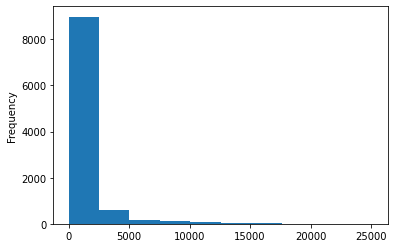

In [19]:
df['vote_count'].plot.hist()

**Word Cloud Movie Overview**

In [20]:
df['overview'] = df['overview'].astype(str)

In [21]:
def plot_word_cloud(dataframe, series):
    try:
        text = ' '.join(dataframe[series])

        wordcloud = WordCloud(width = 1600 , height = 800, 
                              background_color ='black',                          
                              max_words=2000,
                              max_font_size=300,
                              min_font_size = 20).generate(text)

        plt.figure(figsize=(12, 8), facecolor = 'k', edgecolor = 'k' )
        plt.imshow(wordcloud, interpolation = 'bilinear')
        plt.axis("off")
        plt.tight_layout(pad = 0) 
        plt.show()
    
    except TypeError:
        print("Expected str instance")

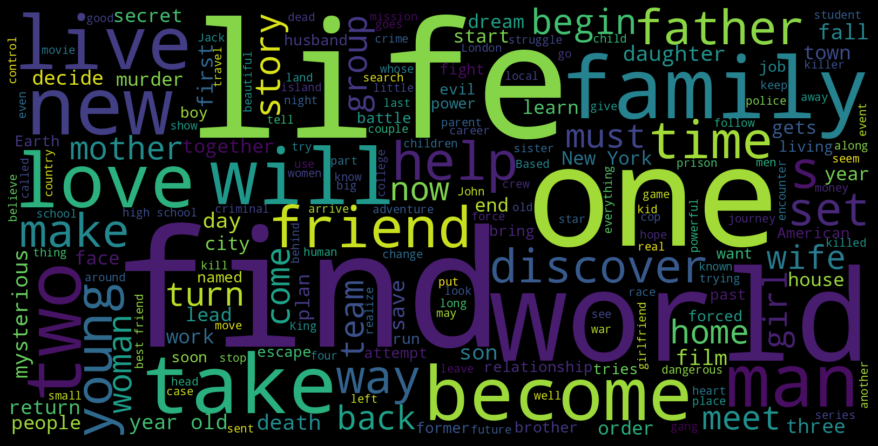

In [22]:
plot_word_cloud(df, "overview")

**Correlation between Length of Overview and Vote**

In [23]:
df['overview_length'] = df['overview'].str.len()

In [24]:
corr = df['overview_length'].corr(df['vote_average'])
print(f"Correlation between overview length and vote average: {corr:.2f}")

Correlation between overview length and vote average: 0.07


## Recommendation System

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tf = TfidfVectorizer(min_df=4, max_df=0.7)

tf.fit(df['overview'])
tf.get_feature_names_out()

array(['000', '007', '10', ..., 'zones', 'zoo', 'zooey'], dtype=object)

In [37]:
tfidf_matrix = tf.fit_transform(df['overview'])

tfidf_matrix.shape

(10000, 9380)

In [38]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(),
    index=df['title']
).sample(22, axis=1).sample(10, axis=0)

,insane,repercussions,improbable,menacing,suspecting,realization,banned,maine,11,midwesterner,...,bartender,reporters,intricate,chan,grade,queens,dominant,laboratory,rio,digging
title,,,,,,,,,,,,,,,,,,,,,
In Time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chappaquiddick,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hot Pursuit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shrek the Halls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Thousand Words,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Philadelphia Experiment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Phineas and Ferb the Movie: Across the 2nd Dimension,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Idle Hands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thirst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Cosine Similarity**

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.03285682, 0.00618612, ..., 0.01855173, 0.01436412,
        0.00659876],
       [0.03285682, 1.        , 0.02988821, ..., 0.05123492, 0.01960261,
        0.0339008 ],
       [0.00618612, 0.02988821, 1.        , ..., 0.0362824 , 0.00425536,
        0.00476738],
       ...,
       [0.01855173, 0.05123492, 0.0362824 , ..., 1.        , 0.        ,
        0.00305627],
       [0.01436412, 0.01960261, 0.00425536, ..., 0.        , 1.        ,
        0.0044537 ],
       [0.00659876, 0.0339008 , 0.00476738, ..., 0.00305627, 0.0044537 ,
        1.        ]])

In [41]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['title'], columns=df['title'])

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

title,The Getaway,The Four Feathers,Deadgirl,City By The Sea,Regarding Henry
title,,,,,
Louis C.K.: Chewed Up,0.027154,0.053377,0.009995,0.030044,0.029012
Barbie & Her Sisters in a Puppy Chase,0.010073,0.032072,0.055782,0.000000,0.036727
PlayTime,0.052327,0.054296,0.076776,0.037359,0.037143
Cannibal Hookers,0.029179,0.021514,0.032779,0.025478,0.011475
Melody Time,0.041772,0.024080,0.012758,0.011869,0.000000
The Humanity Bureau,0.020940,0.023731,0.026551,0.021048,0.065900
Boruto: Naruto the Movie,0.061043,0.097404,0.020507,0.177947,0.109217
Monster High: 13 Wishes,0.040328,0.034269,0.117134,0.026531,0.006928
Infidelity in Suburbia,0.008093,0.007539,0.043150,0.025664,0.000000


**The Recommendation**

In [42]:
def movie_recommendation(title_name, similarity_data=cosine_sim_df, items=df[['title', 'overview']], k=5):
    index = similarity_data.loc[:,title_name].to_numpy().argpartition(range(-1, -k, -1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(title_name, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [44]:
movie_recommendation('Boruto: Naruto the Movie')

,title,overview
0,Naruto Shippuden the Movie: The Lost Tower,"Assigned on a mission to capture Mukade, a mis..."
1,Naruto Shippuden the Movie,"Demons that once almost destroyed the world, a..."
2,Naruto the Movie: Legend of the Stone of Gelel,"Naruto, Shikamaru, and Sakura are executing th..."
3,Little Boy,An eight-year-old boy is willing to do whateve...
4,Cat on a Hot Tin Roof,An alcoholic ex-football player drinks his day...
